# Assignment - Naive Bayes

Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\12\SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\12\SalaryData_Test.csv.crdownload")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,46,Private,HS-grad,9,Married-spouse-absent,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
5672,53,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,Yugoslavia,>50K
5673,33,Private,Bachelors,13,Never-married,Sales,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
5674,58,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K


# Performing EDA In Train Dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5676 non-null   int64  
 1   workclass      5676 non-null   object 
 2   education      5676 non-null   object 
 3   educationno    5676 non-null   int64  
 4   maritalstatus  5676 non-null   object 
 5   occupation     5676 non-null   object 
 6   relationship   5676 non-null   object 
 7   race           5675 non-null   object 
 8   sex            5675 non-null   object 
 9   capitalgain    5675 non-null   float64
 10  capitalloss    5675 non-null   float64
 11  hoursperweek   5675 non-null   float64
 12  native         5675 non-null   object 
 13  Salary         5675 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 620.9+ KB


In [6]:
train.shape

(30161, 14)

In [7]:
test.shape

(5676, 14)

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5676.0,38.508104,13.293970,17.0,28.0,37.0,47.0,90.0
educationno,5676.0,10.110641,2.580459,1.0,9.0,10.0,13.0,16.0
capitalgain,5675.0,1194.714714,8097.352151,0.0,0.0,0.0,0.0,99999.0
capitalloss,5675.0,90.781145,410.613071,0.0,0.0,0.0,0.0,3175.0
hoursperweek,5675.0,40.992423,12.084786,1.0,40.0,40.0,45.0,99.0


In [10]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Visualization of data

<AxesSubplot:xlabel='Salary', ylabel='count'>

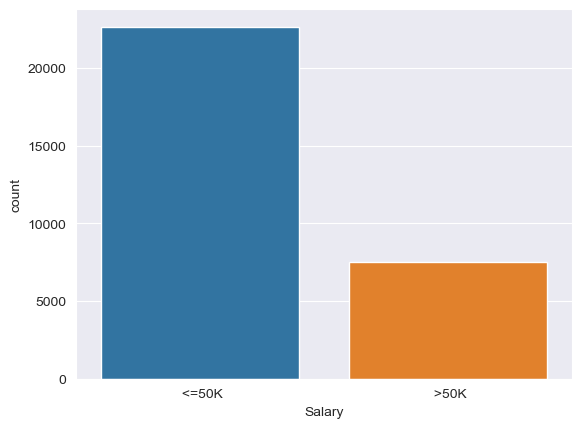

In [11]:
sns.countplot(x = train['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

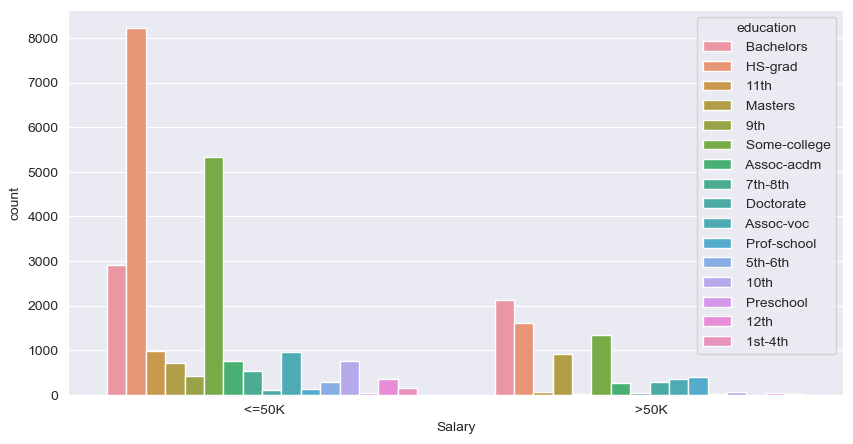

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['Salary'],hue= train['education'])


<AxesSubplot:xlabel='Salary', ylabel='count'>

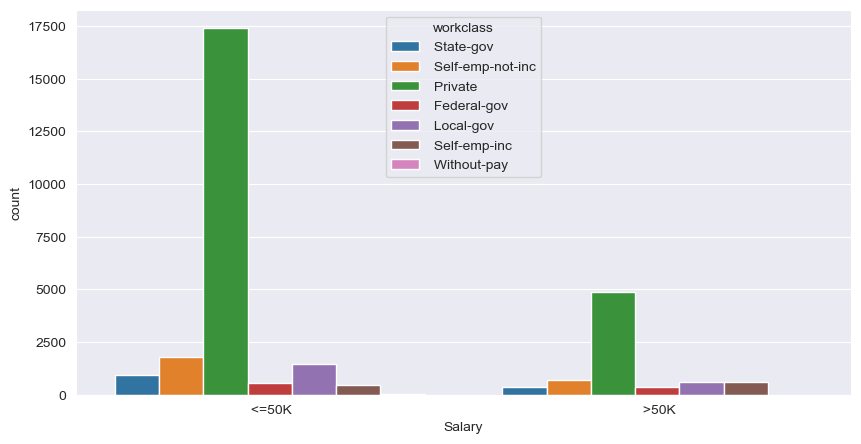

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['Salary'], hue= train['workclass'])


<AxesSubplot:xlabel='Salary', ylabel='count'>

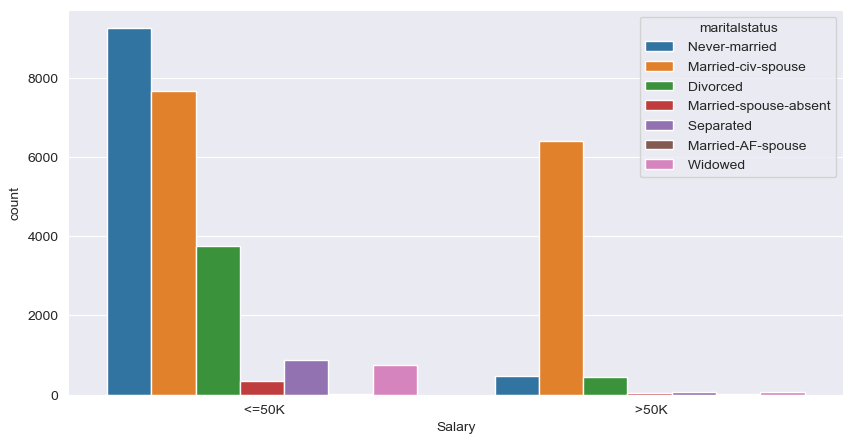

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['Salary'], hue= train['maritalstatus'])


<AxesSubplot:xlabel='Salary', ylabel='count'>

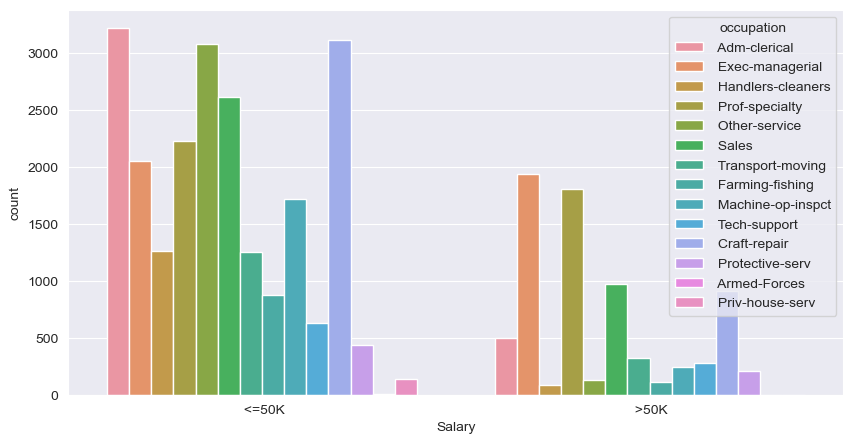

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x = train['Salary'], hue = train['occupation'])


In [16]:
x_train=train.iloc[:,:13]
y_train=train[["Salary"]]

In [17]:
x_test=train.iloc[:,:13]
y_test=train[["Salary"]]

In [18]:
catagorical=[cat for cat in x_train.columns if x_train[cat].dtype=="object"]
catagorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [19]:
x_train=pd.get_dummies(x_train,columns=catagorical)
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_train.head(3)

,Salary
0,<=50K
1,<=50K
2,<=50K


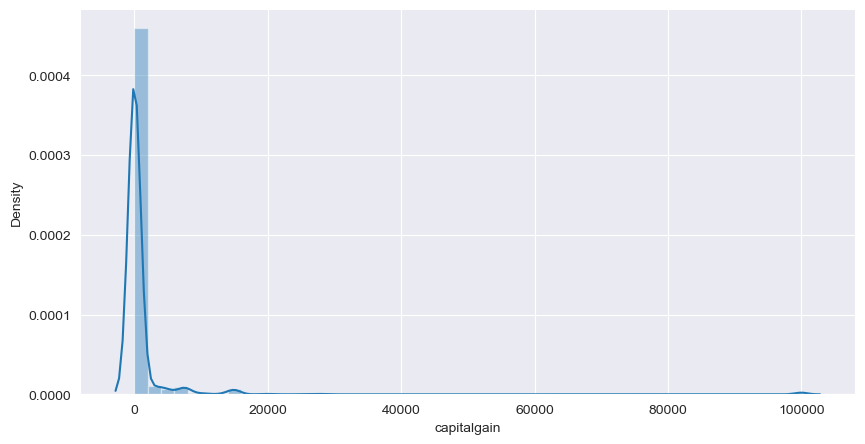

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(train['capitalgain'])
plt.show()

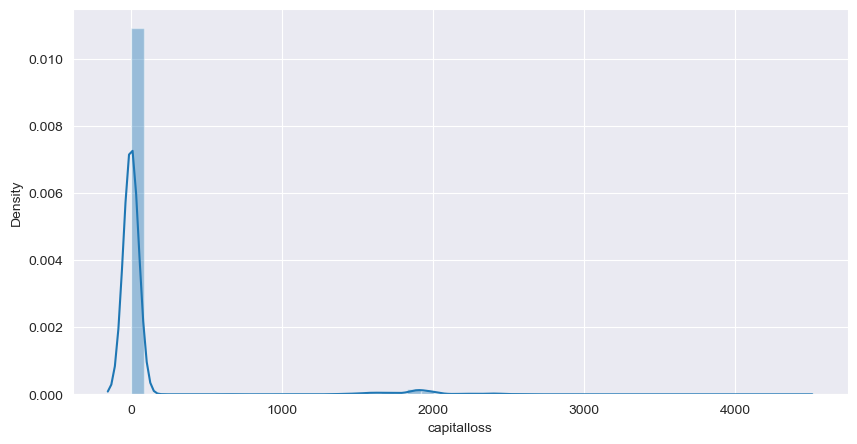

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(train['capitalloss'])
plt.show()

# Model building

In [23]:
y_train=pd.get_dummies(y_train,columns=["Salary"],drop_first=True)
y_train.head(3)

,Salary_ >50K
0,0
1,0
2,0


In [24]:
y_train.value_counts()

Salary_ >50K
0               22653
1                7508
dtype: int64

In [25]:
y_train.rename(columns={"Salary_ >50K":"Salary"},inplace=True)

In [26]:
x_test=pd.get_dummies(x_test,columns=catagorical)

In [27]:
y_test=pd.get_dummies(y_test,columns=["Salary"],drop_first=True)
y_test.rename(columns={"Salary_ >50K":"Salary"},inplace=True)

In [28]:
model=gb()

In [29]:
model.fit(x_train,y_train)

GaussianNB()

In [30]:
y_train_pred=model.predict(x_train)

In [31]:
y_test_pred=model.predict(x_test)

In [33]:
# Accuracy on train data
accuracy_score(y_train,y_train_pred) 

0.8031563940187659

In [34]:
# Accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8031563940187659

#Hence, model is not overfitted as test and train accuracies are almost same

In [35]:
y_test.value_counts()

Salary
0         22653
1          7508
dtype: int64

In [36]:
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


#We can see that our model accuracy score is 0.803 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

# Confusion matrix

In [37]:
cm = confusion_matrix(y_test, y_test_pred)

<AxesSubplot:>

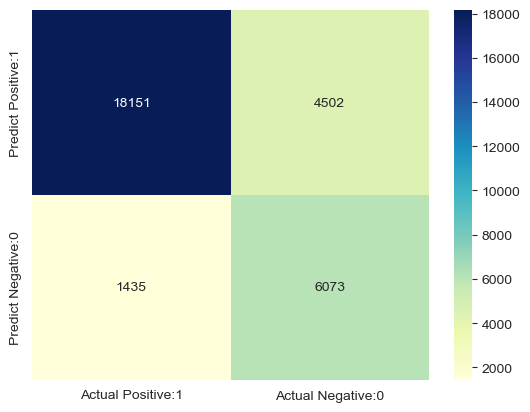

In [38]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161

